In [57]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import matplotlib.pyplot as plt

In [58]:
data = keras.datasets.fashion_mnist

In [59]:
(train_Images, train_Labels), (test_Images, test_Labels) = data.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [60]:
print(train_Labels)

[9 0 0 ... 3 0 5]


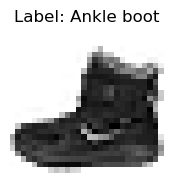

In [78]:
plt.figure(figsize=(2,2))
plt.imshow(train_Images[0], cmap=plt.cm.binary)
plt.title(f"Label: {class_names[train_Labels[0]]}")
plt.axis('off')
plt.show()

In [62]:
train_Images = train_Images / 255.0
test_Images = test_Images / 255.0

In [63]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_Images, train_Labels, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_Images, test_Labels)
print('Test accuracy:', test_acc)


C:\Users\uoabd\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7838 - loss: 0.6276
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8623 - loss: 0.3836
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8795 - loss: 0.3350
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8863 - loss: 0.3102
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8934 - loss: 0.2941
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8800 - loss: 0.3344
Test accuracy: 0.8776999711990356


In [64]:
predictions = model.predict(test_Images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


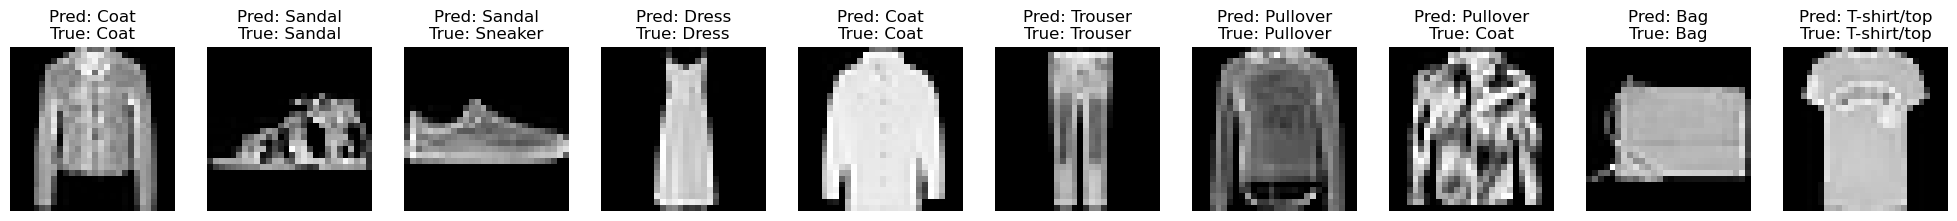

In [80]:
fig, axs = plt.subplots(1, 10, figsize=(25, 15))

for i in range(10,20):
    axs[i-10].imshow(test_Images[i], cmap='gray')

    predicted_class = class_names[np.argmax(predictions[i])]
    true_class = class_names[test_Labels[i]]

    axs[i-10].set_title(f"Pred: {predicted_class}\nTrue: {true_class}")
    axs[i-10].axis('off')  # Turn off axis